# Customer Churn Analysis Prediction

Customer churn occurs when a customer stops using a company’s service lead to revenue loss. Analyzing churn helps businesses understand why customers leave and how to improve retention. High churn rates can affect revenue and business growth. By analyzing churn patterns businesses can take proactive steps to retain customers.

In this project we will explore the Telco Customer Churn dataset to predict churn effectively.

- tenure – The number of months a customer has stayed with the company.
- InternetService – The type of internet service the customer has DSL, Fiber optic or None.
- PaymentMethod– The method the customer uses for payments.
- Churn – The target variable i.e Yes for customer churned and No for customer stayed

#### Step 1: Importing Libraries and Dataset

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
dataset = pd.read_csv('Telco-Customer-Churn.csv')
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


To gain insights into the dataset we first check for missing values and understand its structure. The dataset includes features such as:

In [2]:
dataset.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Analyzing Churn Distribution: we check the number of churners and non-churners to understand the balance of the dataset.

In [6]:
dataset['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

#### Step 2: Data Preprocessing

Handling Missing and Incorrect Values: before processing we ensure that all numerical columns contain valid values. The TotalCharges column sometimes has empty spaces which need to be converted to numerical values.

In [8]:
dataset['TotalCharges'] = pd.to_numeric(dataset['TotalCharges'], errors='coerce')
dataset['TotalCharges'].fillna(dataset['TotalCharges'].median(), inplace=True)

C:\Users\able3\AppData\Local\Temp\ipykernel_94832\266048525.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['TotalCharges'].fillna(dataset['TotalCharges'].median(), inplace=True)


Handling Categorical Variables: Some features like State, International Plan and Voice Mail Plan are categorical and must be converted into numerical values for model training.

In [12]:
from sklearn.preprocessing import LabelEncoder

Labelencoder = LabelEncoder()
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 
                    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
                    'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

for col in categorical_cols:
    dataset[col] = Labelencoder.fit_transform(dataset[col])

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   int64  
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   int64  
 16  PaperlessBilling  7043 non-null   int64  


Feature Selection and Splitting Data

In [13]:
from sklearn.model_selection import train_test_split

X=dataset.drop(['customerID','Churn'], axis=1)
y = dataset['Churn']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

Feature Scaling: since features are on different scales we apply standardization to improve model performance. It prevents models from being biased toward larger numerical values and improves convergence speed in optimization algorithms like gradient descent.

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

#### Step3: Model Training and Prediction

For training our model we use Random Forest Classifier. It is an ensemble learning method that combines the results of multiple decision trees to make a final prediction.

In [16]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

#### Step 4: Model Evaluation

Accuracy Score: to measure model performance we calculate accuracy using the accuracy_score function.

In [18]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.78


Confusion Matrix and Performance Metrics: we evaluate precision, recall and accuracy using a confusion matrix.

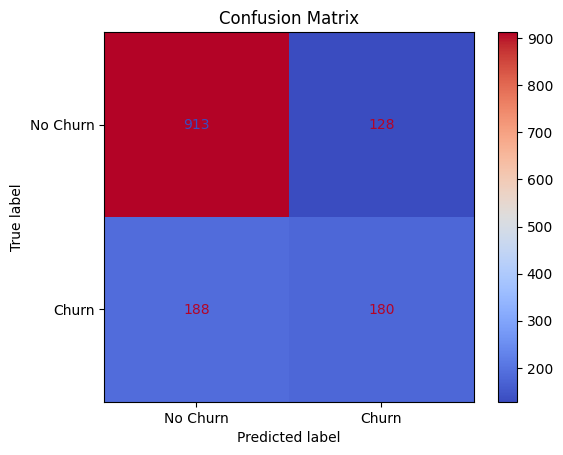

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Churn","Churn"])
disp.plot(cmap='coolwarm')
plt.title("Confusion Matrix")
plt.show()

#### End:

Confusion matrix shows how well the model predicts customer churn. It correctly identifies 924 non-churners and 181 churners. However 117 non-churners are wrongly classified as churners and 187 churners are missed. The high number of missed churners suggests the model may need further tuning.